# **MÓDULO 19**
# Exercício: Estatística Aplicada

**Efetividade de Duas Estratégias de Ensino**

Imagine que uma escola esteja avaliando a eficácia de duas estratégias de ensino de matemática para alunos do ensino médio. Eles querem determinar se há uma diferença significativa no desempenho médio dos alunos entre as duas estratégias.

# **Hipóteses:**

* Hipótese nula (H0): A média das notas dos alunos na estratégia A é igual à média das notas dos alunos na estratégia B.
* Hipótese alternativa (H1): A média das notas na Estratégia B é maior do que a média das notas na Estratégia A.

# **Dados:**

* Amostra da Estratégia A: Notas de 50 alunos que receberam a Estratégia A.
* Amostra da Estratégia B: Notas de 50 alunos que receberam a Estratégia B.

Usaremos um teste Z para comparar as médias das notas entre as duas amostras.

Se o p-valor do teste Z for menor que um nível de significância pré-determinado (por exemplo, α = 0.05), rejeitamos a hipótese nula e concluímos que há uma diferença significativa nas médias das notas entre as duas estratégias de ensino.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

Os dados são criados a seguir:

In [3]:
# Definindo médias e desvios padrão para as notas nas duas estratégias
media_estrategia_A = 70
desvio_padrao_estrategia_A = 10

media_estrategia_B = 75
desvio_padrao_estrategia_B = 12

# Gerando as amostras de notas para cada estratégia de ensino da nossa base
np.random.seed(0)  # Para garantir a reprodutibilidade dos resultados
amostra_estrategia_A = np.random.normal(loc=media_estrategia_A, scale=desvio_padrao_estrategia_A, size=50)
amostra_estrategia_B = np.random.normal(loc=media_estrategia_B, scale=desvio_padrao_estrategia_B, size=50)

print("Notas da Estratégia A:", amostra_estrategia_A[:5])
print("Notas da Estratégia B:", amostra_estrategia_B[:5])

Notas da Estratégia A: [87.64052346 74.00157208 79.78737984 92.40893199 88.6755799 ]
Notas da Estratégia B: [64.25440127 79.64282997 68.87033835 60.83241379 74.66181326]


# 1) De acordo com as informações analisadas o nosso teste é unilateral á direita, esquerda ou bicaudal? Justifique.




O teste é unilateral á direita, pois nosso teste de hipótese implica em H1 : mi > mi0 (queremos saber se a média nova é MAIOR que a média anterior)

# 2) Calcule as médias para as duas amostragens e as variâncias. Quais insights você pode retirar comparando os dados?

In [11]:
media_A = np.mean(amostra_estrategia_A)
media_B = np.mean(amostra_estrategia_B)

# Cálculo das variâncias amostrais
variancia_A = np.var(amostra_estrategia_A, ddof=1)
variancia_B = np.var(amostra_estrategia_B, ddof=1)

print(f"Média A: ", media_A)
print(f"Variância A: ", variancia_A)
print(f"Média B: ", media_B)
print(f"Variância B: ", variancia_B)

Média A:  71.40559272313098
Variância A:  129.2654943565623
Média B:  74.74868110507046
Variância B:  110.4700206552835


A Estratégia B resultou emm uma média de notas superior (aprox 75 contra aprox 71), o que sugere que ela podee ser mais eficaz em termos de melhorar o desempenho geral. Por outro lado, a Estratégia A apresentou menor variância, indicando mais consistência no desempenho dos alunos (menos diferença entre os melhores e piores resultados)

# 3) Imprima os resultados da estatística do teste Z, p value e indique se rejeitaremos ou não a hipótese nula. Justifique sua resposta.

In [13]:
t_stat, p_value = stats.ttest_ind(amostra_estrategia_A, amostra_estrategia_B, equal_var=False)

print("T = ",t_stat)
print("p-value = ",p_value)

T =  -1.5267455833477102
p-value =  0.13006515044776537


Quando adotamos um nível de significância 0,05, falhamos em rejeitar H1, ou seja, não ha evidências que as notas da estratégia A e B sejam diferentes, visto que 0.13 > 0,05

# 4) Para finalizar monte o gráfico da distribuição da estatística do nosso teste Z e explique o que pode ser observado através dele.

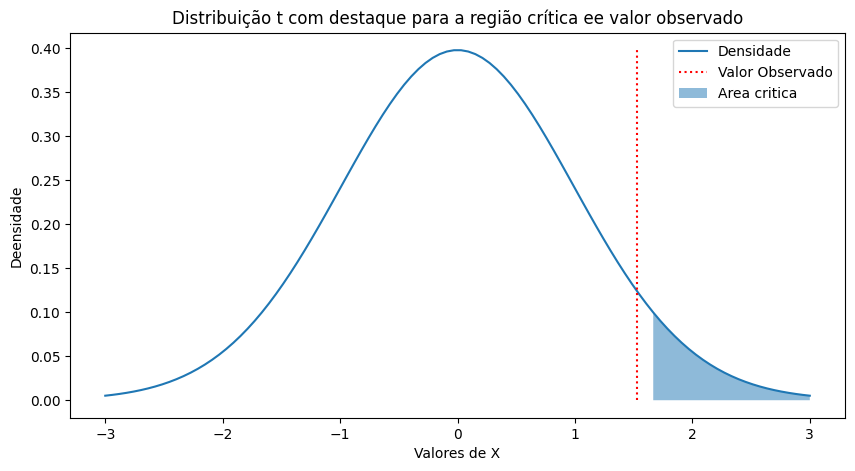

In [19]:
fig, ax = plt.subplots(figsize=(10, 5))

mu = 0
variance = 1
sigma = variance**.5

x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
y = stats.t.pdf(x, len(amostra_estrategia_A) + len(amostra_estrategia_B) -2)

low = stats.t.ppf(.95, len(amostra_estrategia_A) + len(amostra_estrategia_B) - 2)

high = np.inf

ax.plot(x,y,label='Densidade')

ax.vlines(x=[-t_stat], ymin=0, ymax=y.max(), colors='r', linestyles='dotted', label='Valor Observado')

plt.fill_between(x, y, where=(low < x) & (x < high), alpha= .5, label='Area critica')

plt.legend()
plt.xlabel('Valores de X')
plt.ylabel('Deensidade')
plt.title('Distribuição t com destaque para a região crítica ee valor observado')
plt.show()

Com isso, percebemos que o valor-p, não está contido dentro da área crítica.